# COCO based object classification

In [1]:
from util.PreProcessing import filterDataset, dataGeneratorCoco
from util.getModel import build_model
from tensorflow.keras import models, losses

## For visualizing results
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

## Importing the Coco dataset, filtering and creating generator objects.

In [2]:
# Preprocessing arguments
folder = 'D:/COCOdata'
classes = ['cat', 'dog', 'horse']
batch_size = 4
input_image_size = (224,224)
mask_type = 'normal'
augGeneratorArgs = dict(featurewise_center = False, 
                        samplewise_center = False,
                        rotation_range = 5, 
                        width_shift_range = 0.01, 
                        height_shift_range = 0.01, 
                        brightness_range = (0.8,1.2),
                        shear_range = 0.01,
                        zoom_range = [1, 1.25],  
                        horizontal_flip = True, 
                        vertical_flip = False,
                        fill_mode = 'reflect',
                        data_format = 'channels_last')

# -> Create filtered train dataset (using filterDataset())
images_t, labels_t, dataset_size_t, coco_t = filterDataset(folder, classes,  mode='train2017')
# -> Create train generator (using dataGeneratorCoco())
train_gen = dataGeneratorCoco(images_t, labels_t, classes, coco_t, folder,
                              input_image_size, batch_size, mode="train2017")
#train_gen_aug = augmentationsGenerator(train_gen, augGeneratorArgs)


# -> Create filtered val dataset (using filterDataset()) 
images_v, labels_v, dataset_size_v, coco_v = filterDataset(folder, classes,  mode='val2017')
# -> Create val generator (using dataGeneratorCoco()) 
mode="val2017";
val_gen = dataGeneratorCoco(images_v, labels_v, classes, coco_v, folder,
                            input_image_size, batch_size, mode)
# val_gen_aug = augmentationsGenerator(val_gen, augGeneratorArgs) # <-- fix this later

n_epochs = 10

steps_per_epoch = dataset_size_t // (n_epochs)
validation_steps = dataset_size_v // (n_epochs)

loading annotations into memory...
Done (t=22.17s)
creating index...
index created!
loading annotations into memory...
Done (t=0.68s)
creating index...
index created!


## Building a model, training and evaluating it.

In [3]:
inputshape = input_image_size + tuple([3]) # three colours means three dimentions
nr_of_classes = len(classes)

model = build_model(inputshape, nr_of_classes)

model.summary()

Model: "Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0

In [4]:
opt = 'adam'
lossFn = losses.CategoricalCrossentropy(from_logits=True) 

# Compile your model first
model.compile(loss = lossFn, optimizer = opt, metrics=['accuracy'])

In [5]:
# Start the training process
hist = model.fit(x = train_gen,
                validation_data = val_gen,
                steps_per_epoch = steps_per_epoch,
                validation_steps = validation_steps,
                epochs = n_epochs,
                verbose = True)

Epoch 1/10


C:\Users\David\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


111/111 [==============================] - 112s 1s/step - loss: 1.3748 - accuracy: 0.5315 - val_loss: 0.9100 - val_accuracy: 0.5625
Epoch 2/10
111/111 [==============================] - 111s 999ms/step - loss: 1.5644 - accuracy: 0.5495 - val_loss: 0.9846 - val_accuracy: 0.5000
Epoch 3/10
111/111 [==============================] - 118s 1s/step - loss: 1.4857 - accuracy: 0.5743 - val_loss: 1.1445 - val_accuracy: 0.5625
Epoch 4/10
111/111 [==============================] - 119s 1s/step - loss: 1.7064 - accuracy: 0.5721 - val_loss: 1.0293 - val_accuracy: 0.7500
Epoch 5/10
111/111 [==============================] - 119s 1s/step - loss: 1.7421 - accuracy: 0.5653 - val_loss: 2.0840 - val_accuracy: 0.4375
Epoch 6/10
111/111 [==============================] - 117s 1s/step - loss: 1.4810 - accuracy: 0.5743 - val_loss: 1.3312 - val_accuracy: 0.6875
Epoch 7/10
111/111 [==============================] - 121s 1s/step - loss: 1.5361 - accuracy: 0.5833 - val_loss: 1.0019 - val_accuracy: 0.6875
Epoch 8

In [6]:
# Save the model architecture, weights, optimizer and loss metrics
model.save("models/VGG19-Imagenet-15122021")

INFO:tensorflow:Assets written to: models/VGG19-Imagenet-15122021\assets


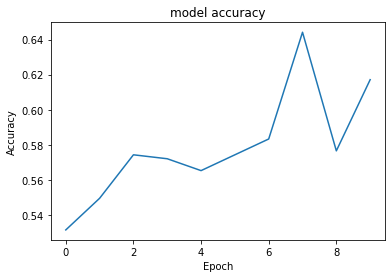

In [8]:
#model1 = models.load_model("models/VGG19-Imagenet-14122021")
plt.plot(hist.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

#### Tip:
You can create a separate .py file (say cocoFunctions.py) and copy the code for the imports, filterDataset function, and dataGeneratorCoco + supporting functions. This will help make the code more systematic.

You can then simply import the functions into any code by using:  
from cocoFunctions import filterDataset, dataGeneratorCoco